In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Initialize Data

## Transaction & Actor Dataset

In [2]:
txs_class = pd.read_csv('/Users/kebin/Documents/Projects/Fintech_ML_Blockchain_FraudDetection/data/01-raw/txs_classes.csv')
txs_edgelist = pd.read_csv('/Users/kebin/Documents/Projects/Fintech_ML_Blockchain_FraudDetection/data/01-raw/txs_edgelist.csv')
txs_features = pd.read_csv('/Users/kebin/Documents/Projects/Fintech_ML_Blockchain_FraudDetection/data/01-raw/txs_features.csv')
txaddr_edgelist = pd.read_csv('/Users/kebin/Documents/Projects/Fintech_ML_Blockchain_FraudDetection/data/01-raw/TxAddr_edgelist.csv')
addrtx_edgelist = pd.read_csv('/Users/kebin/Documents/Projects/Fintech_ML_Blockchain_FraudDetection/data/01-raw/AddrTx_edgelist.csv')
addraddr_edgelist = pd.read_csv('/Users/kebin/Documents/Projects/Fintech_ML_Blockchain_FraudDetection/data/01-raw/AddrAddr_edgelist.csv')
wallet_combined = pd.read_csv('/Users/kebin/Documents/Projects/Fintech_ML_Blockchain_FraudDetection/data/01-raw/wallets_features_classes_combined.csv')

In [3]:
txs_features.shape

(203769, 184)

In [4]:
txs_features['txId'].nunique()
addrtx_edgelist['txId'].nunique()

202804

# Data Aggregation

Aggregation Planning

1. txs_features ['txId'] LEFT JOIN ON txs_class['txId']

In [5]:
# Merge class and features dataset
df_txs = txs_features.copy()
df_txs.insert(loc=2, column = 'class', value=txs_class['class'])
df_txs['class'].value_counts()

class
3    157205
2     42019
1      4545
Name: count, dtype: int64

In [6]:
# Rearranging columns

cols_rearrange = ['txId', 'Time step',
                  'Local_feature_1','Local_feature_2','Local_feature_3',
                  'Local_feature_4','Local_feature_5','Local_feature_6',
                  'Local_feature_7','Local_feature_8','Local_feature_9',
                  'Local_feature_10','Local_feature_11','Local_feature_12',
                  'Local_feature_13','Local_feature_14','Local_feature_15',
                  'Local_feature_16','Local_feature_17','Local_feature_18',
                  'Local_feature_19','Local_feature_20','Local_feature_21',
                  'Local_feature_22','Local_feature_23','Local_feature_24',
                  'Local_feature_25','Local_feature_26','Local_feature_27',
                  'Local_feature_28','Local_feature_29','Local_feature_30',
                  'Local_feature_31','Local_feature_32','Local_feature_33',
                  'Local_feature_34','Local_feature_35','Local_feature_36',
                  'Local_feature_37','Local_feature_38','Local_feature_39',
                  'Local_feature_40','Local_feature_41','Local_feature_42',
                  'Local_feature_43','Local_feature_44','Local_feature_45',
                  'Local_feature_46','Local_feature_47','Local_feature_48',
                  'Local_feature_49','Local_feature_50','Local_feature_51',
                  'Local_feature_52','Local_feature_53','Local_feature_54',
                  'Local_feature_55','Local_feature_56','Local_feature_57',
                  'Local_feature_58','Local_feature_59','Local_feature_60',
                  'Local_feature_61','Local_feature_62','Local_feature_63',
                  'Local_feature_64','Local_feature_65','Local_feature_66',
                  'Local_feature_67','Local_feature_68','Local_feature_69',
                  'Local_feature_70','Local_feature_71','Local_feature_72',
                  'Local_feature_73','Local_feature_74','Local_feature_75',
                  'Local_feature_76','Local_feature_77','Local_feature_78',
                  'Local_feature_79','Local_feature_80','Local_feature_81',
                  'Local_feature_82','Local_feature_83','Local_feature_84',
                  'Local_feature_85','Local_feature_86','Local_feature_87',
                  'Local_feature_88','Local_feature_89','Local_feature_90',
                  'Local_feature_91','Local_feature_92','Local_feature_93',
                  'Aggregate_feature_1','Aggregate_feature_2','Aggregate_feature_3',
                  'Aggregate_feature_4','Aggregate_feature_5','Aggregate_feature_6',
                  'Aggregate_feature_7','Aggregate_feature_8','Aggregate_feature_9',
                  'Aggregate_feature_10','Aggregate_feature_11','Aggregate_feature_12',
                  'Aggregate_feature_13','Aggregate_feature_14','Aggregate_feature_15',
                  'Aggregate_feature_16','Aggregate_feature_17','Aggregate_feature_18',
                  'Aggregate_feature_19','Aggregate_feature_20','Aggregate_feature_21',
                  'Aggregate_feature_22','Aggregate_feature_23','Aggregate_feature_24',
                  'Aggregate_feature_25','Aggregate_feature_26','Aggregate_feature_27',
                  'Aggregate_feature_28','Aggregate_feature_29','Aggregate_feature_30',
                  'Aggregate_feature_31','Aggregate_feature_32','Aggregate_feature_33',
                  'Aggregate_feature_34','Aggregate_feature_35','Aggregate_feature_36',
                  'Aggregate_feature_37','Aggregate_feature_38','Aggregate_feature_39',
                  'Aggregate_feature_40','Aggregate_feature_41','Aggregate_feature_42',
                  'Aggregate_feature_43','Aggregate_feature_44','Aggregate_feature_45',
                  'Aggregate_feature_46','Aggregate_feature_47','Aggregate_feature_48',
                  'Aggregate_feature_49','Aggregate_feature_50','Aggregate_feature_51',
                  'Aggregate_feature_52','Aggregate_feature_53','Aggregate_feature_54',
                  'Aggregate_feature_55','Aggregate_feature_56','Aggregate_feature_57',
                  'Aggregate_feature_58','Aggregate_feature_59','Aggregate_feature_60',
                  'Aggregate_feature_61','Aggregate_feature_62','Aggregate_feature_63',
                  'Aggregate_feature_64','Aggregate_feature_65','Aggregate_feature_66',
                  'Aggregate_feature_67','Aggregate_feature_68','Aggregate_feature_69',
                  'Aggregate_feature_70','Aggregate_feature_71','Aggregate_feature_72',
                  'in_txs_degree','out_txs_degree','total_BTC','fees','size',
                  'num_input_addresses','num_output_addresses','in_BTC_min',
                  'in_BTC_max','in_BTC_mean','in_BTC_median','in_BTC_total',
                  'out_BTC_min','out_BTC_max','out_BTC_mean','out_BTC_median','out_BTC_total', 'class']

df_txs = df_txs[cols_rearrange]
df_txs.head()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2


In [7]:
wallet_combined.head()

,address,Time step,class,num_txs_as_sender,num_txs_as receiver,first_block_appeared_in,last_block_appeared_in,lifetime_in_blocks,total_txs,first_sent_block,...,blocks_btwn_output_txs_min,blocks_btwn_output_txs_max,blocks_btwn_output_txs_mean,blocks_btwn_output_txs_median,num_addr_transacted_multiple,transacted_w_address_total,transacted_w_address_min,transacted_w_address_max,transacted_w_address_mean,transacted_w_address_median
0,111112TykSw72ztDN2WJger4cynzWYC5w,25,2,0.0,1.0,439586.0,439586.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,24.0,1.0,1.0,1.0,1.0
1,1111DAYXhoxZx2tsRnzimfozo783x1yC2,25,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
2,1111DAYXhoxZx2tsRnzimfozo783x1yC2,29,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
3,1111DAYXhoxZx2tsRnzimfozo783x1yC2,39,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0
4,1111DAYXhoxZx2tsRnzimfozo783x1yC2,39,3,0.0,8.0,439589.0,485959.0,46370.0,8.0,0.0,...,0.0,20164.0,6624.285714,8060.0,0.0,8.0,1.0,1.0,1.0,1.0


# Data Cleaning

### Checking Missing Values

In [8]:
df_txs[df_txs.isnull().any(axis=1)]
# 965 rows of null values

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
202804,230516478,1,-0.172921,-0.158783,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.163581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
202805,230522097,1,-0.172921,-0.158783,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.163581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
202806,230331387,1,-0.172971,-0.158783,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.163633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
202807,230444459,1,-0.172921,-0.158783,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.163581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
202808,230516459,1,-0.172921,-0.158783,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.163581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,158304003,49,-0.165622,-0.139563,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.156113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203765,158303998,49,-0.167040,-0.139563,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203766,158303966,49,-0.167040,-0.139563,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
203767,161526077,49,-0.172212,-0.139573,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.162856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [9]:
# Dropping null values
df_txs.dropna(inplace=True)
df_txs.shape

(202804, 185)

We lose around 900+ data but count as insignificant due to our larger dataset

In [10]:
# Dropping class 3 (unknown) for simplicity

df_txs = df_txs[df_txs['class'] != 3]
df_txs['class'].value_counts()

class
2    41500
1     4545
Name: count, dtype: int64

In [11]:
# Total cleaned size
print(f'Total Cleaned Size \n \tRows: {df_txs.shape[0]} \n \tColumns: {df_txs.shape[1]}') 

Total Cleaned Size 
 	Rows: 46045 
 	Columns: 185


In [12]:
# Export to CSV
# df_txs.to_csv('/data/02-cleaned/df_txs_cleaned.csv', index = False)

# Exploratory Data Analysis

### Observing Class Imbalance

<BarContainer object of 2 artists>

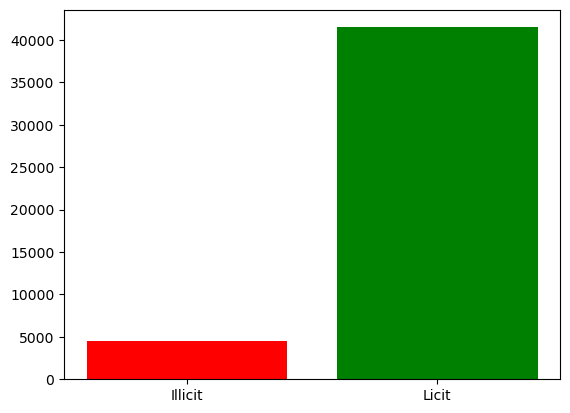

In [13]:
txs_by_class = df_txs.groupby('class').count()
plt.bar(['Illicit', 'Licit'], txs_by_class['txId'].values, color = ['red', 'green'])

In [14]:
# Imbalance Proportion
prop = txs_by_class['txId'].values / df_txs.shape[0] * 100
print(f'Class Proportion: \n \Licit: {prop[1].round(2)}% \n\tIllicit: {prop[0].round(2)}%')

Class Proportion: 
 \Licit: 90.13% 
	Illicit: 9.87%


# Data Resampling

Applying SMOTE to balance class

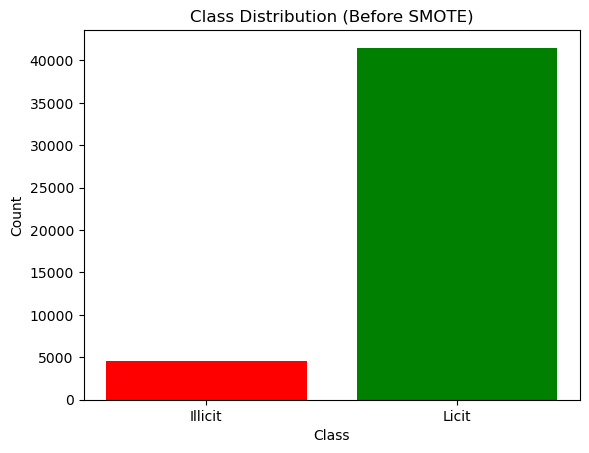

In [15]:
X = df_txs.drop(['txId', 'class'], axis = 1)
y = df_txs['class']

count_class = y.value_counts()
plt.bar(count_class.index, count_class.values, color = ['g', 'r'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (Before SMOTE)')
plt.xticks([1, 2], ['Illicit', 'Licit'])
plt.show()

In [16]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("After SMOTE:\n", y_res.value_counts())

After SMOTE:
 class
2    41500
1    41500
Name: count, dtype: int64


In [17]:
# Applying smote to df_txs
df_txs_smote = pd.concat([X_res, y_res], axis=1)
df_txs_smote.head()

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,-0.118555,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
1,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,5.252974,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
2,1,-0.172726,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163383,-0.169201,...,0.040774,0.040774,0.040774,0.040774,9.480000e-04,0.039726,0.020337,0.020337,0.040674,2
3,1,-0.172921,-0.158783,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163581,-0.169397,...,0.010000,0.010000,0.010000,0.010000,2.900000e-03,0.006900,0.004900,0.004900,0.009800,2
4,1,-0.169967,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160559,-0.166417,...,0.478277,0.478277,0.478277,0.478277,4.630000e-02,0.431877,0.239088,0.239088,0.478177,2


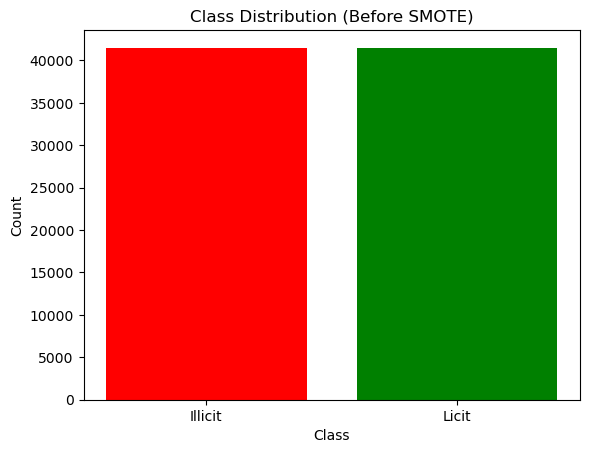

In [18]:
plt.bar(df_txs_smote['class'].value_counts().index, df_txs_smote['class'].value_counts().values, color = ['g', 'r'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (Before SMOTE)')
plt.xticks([1, 2], ['Illicit', 'Licit'])
plt.show()

In [25]:
df_preprocessed = df_txs_smote.copy()
df_preprocessed.head()

,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,-0.118555,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
1,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,5.252974,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
2,1,-0.172726,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163383,-0.169201,...,0.040774,0.040774,0.040774,0.040774,9.480000e-04,0.039726,0.020337,0.020337,0.040674,2
3,1,-0.172921,-0.158783,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163581,-0.169397,...,0.010000,0.010000,0.010000,0.010000,2.900000e-03,0.006900,0.004900,0.004900,0.009800,2
4,1,-0.169967,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160559,-0.166417,...,0.478277,0.478277,0.478277,0.478277,4.630000e-02,0.431877,0.239088,0.239088,0.478177,2


In [26]:
df_preprocessed['class'].value_counts()

class
2    41500
1    41500
Name: count, dtype: int64

In [27]:
print(f'Total Cleaned Size After SMOTE \n \tRows: {df_preprocessed.shape[0]} \n \tColumns: {df_preprocessed.shape[1]}')

Total Cleaned Size After SMOTE 
 	Rows: 83000 
 	Columns: 184


## Beware df_preprocessed has removed txID. This dataset is solely for model development.

In [29]:
# df_preprocessed[df_preprocessed['txId'].isnull()].count()

In [ ]:
# Export to CSV
# df_preprocessed.to_csv('data/03-preprocessed/df_preprocessed.csv', index = False)